<a href="https://colab.research.google.com/github/intuinno/legged_gym/blob/skinner04/notebook/reward_hsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/source/hello_world_tutorial.ipynb)

# Hello world: Planet Kornia

Welcome to Planet Kornia: a set of tutorials to learn about **Computer Vision** in [PyTorch](https://pytorch.org).

This is the first tutorial that show how one can simply start loading images with [Torchvision](https://pytorch.org/vision), [Kornia](https://kornia.org) and [OpenCV](https://opencv.org).


In [ ]:
%%capture
!pip install kornia

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

import torch
import torchvision
import kornia as K

Download first an image form internet to start to work.


In [ ]:
%%capture
!wget https://github.com/kornia/data/raw/main/arturito.jpg

## Load an image with OpenCV

We can use OpenCV to load an image. By default, OpenCV loads images in BGR format and casts to a `numpy.ndarray` with the data layout `(H,W,C)`. 

However, because matplotlib saves an image in RGB format, in OpenCV you need to change the BGR to RGB so that an image is displayed properly.

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[179, 179, 197],
        [179, 179, 197],
        [179, 179, 197],
        ...,
        [179, 179, 197],
        [133, 133, 146],
        [133, 133, 146]],

       [[179, 179, 197],
        [179, 179, 197],
        [179, 179, 197],
        ...,
        [179, 179, 197],
        [179, 179, 197],
        [179, 179, 197]],

       [[179, 179, 197],
        [179, 179, 197],
        [179, 179, 197],
        ...,
        [179, 179, 197],
        [179, 179, 197],
        [179, 179, 197]]

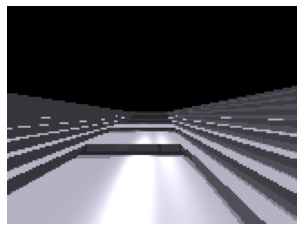

In [ ]:
img_bgr: np.array = cv2.imread('0.png')  # HxWxC / np.uint8
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb); plt.axis('off');
img_rgb

## Load an image with Torchvision

The images can be also loaded using `torchvision` which directly returns the images in a `torch.Tensor` in the shape `(C,H,W)`.



In [ ]:
x_rgba: torch.tensor = torchvision.io.read_image('48.png')  # CxHxW / torch.uint8
x_rgba = x_rgba.unsqueeze(0)  # BxCxHxW
print(x_rgba.shape)
x_rgba

torch.Size([1, 4, 120, 160])


tensor([[[[  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          ...,
          [181, 181, 181,  ..., 179, 133,  79],
          [181, 181, 181,  ..., 179, 179, 133],
          [181, 181, 182,  ..., 179, 179, 179]],

         [[  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          ...,
          [181, 181, 181,  ..., 179, 133,  79],
          [181, 181, 181,  ..., 179, 179, 133],
          [181, 181, 182,  ..., 179, 179, 179]],

         [[  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          ...,
          [199, 199, 199,  ..., 196, 146,  87],
          [199, 199, 199,  ..., 196, 196, 146],
          [199, 199, 200,  ..., 196, 196, 196]],

         [[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 

## Load an image with Kornia

With Kornia we can do all the preceding.

We have a couple of utilities to cast the image to a `torch.Tensor` to make it compliant to the other Kornia components and arrange the data in `(B,C,H,W)`.  

 The utility is [`kornia.image_to_tensor`](https://kornia.readthedocs.io/en/latest/utils.html#kornia.utils.image_to_tensor) which casts a `numpy.ndarray` to a `torch.Tensor` and permutes the channels to leave the image ready for being used with any other PyTorch or Kornia component.  
The image is casted into a 4D `torch.Tensor` with zero-copy.



In [ ]:
x_bgr: torch.tensor = K.image_to_tensor(img_bgr)  # CxHxW / torch.uint8
x_bgr = x_bgr.unsqueeze(0)  # 1xCxHxW
print(f"convert from '{img_bgr.shape}' to '{x_bgr.shape}'")
x_bgr

convert from '(120, 160, 3)' to 'torch.Size([1, 3, 120, 160])'


tensor([[[[  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          ...,
          [197, 197, 197,  ..., 197, 146, 146],
          [197, 197, 197,  ..., 197, 197, 197],
          [197, 197, 197,  ..., 197, 197, 197]],

         [[  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          ...,
          [179, 179, 179,  ..., 179, 133, 133],
          [179, 179, 179,  ..., 179, 179, 179],
          [179, 179, 179,  ..., 179, 179, 179]],

         [[  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          ...,
          [179, 179, 179,  ..., 179, 133, 133],
          [179, 179, 179,  ..., 179, 179, 179],
          [179, 179, 179,  ..., 179, 179, 179]]]], dtype=torch.uint8)

We can convert from BGR to RGB with a [`kornia.color`](https://kornia.readthedocs.io/en/latest/color.html) component.


## Visualize an image with Matplotib

In [ ]:
# x_rgb: torch.tensor = K.color.bgr_to_rgb(x_bgr)  # 1xCxHxW / torch.uint8
x_rgb = K.color.rgba_to_rgb(x_rgba/255.)


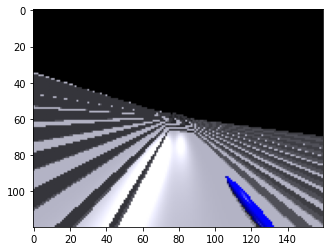

In [ ]:
img_x_rgb = K.tensor_to_image(x_rgb)
plt.imshow(img_x_rgb)

In [ ]:
x_hsv = K.color.rgb_to_hsv(x_rgb)

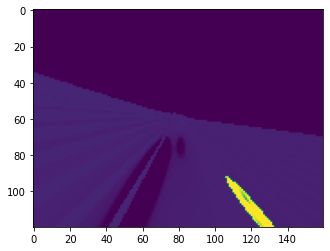

In [ ]:
saturation = x_hsv[:,1,:,:]
plt.imshow(saturation.squeeze())

In [ ]:
a = torch.where(saturation > 0.4, torch.tensor([1.]), torch.tensor([0.]))

In [ ]:
img_a = K.tensor_to_image(a)

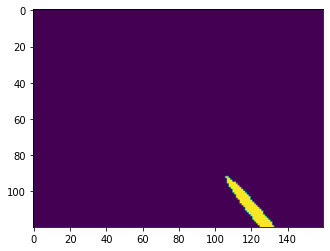

In [ ]:
plt.imshow(img_a)

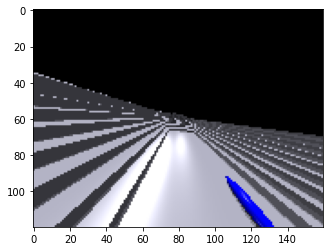

In [ ]:
hues.unique()
img_rgb = K.tensor_to_image(x_rgba)
plt.imshow(img_rgb)

In [ ]:
x0_rgba: torch.tensor = torchvision.io.read_image('0.png')  # CxHxW / torch.uint8
x0_rgba = x0_rgba.unsqueeze(0)  # BxCxHxW

In [ ]:
x0_rgb = K.color.rgba_to_rgb(x0_rgba)
x0_hsv = K.color.rgb_to_hsv(x0_rgb)
hues0 = x0_hsv[:,0,:,:]
hues0.unique()

tensor([0.0000, 1.0472])

We will use [Matplotlib](https://matplotlib.org/) for the visualisation inside the notebook. Matplotlib requires a `numpy.ndarray` in the `(H,W,C)` format, and for doing so we will go back with [`kornia.tensor_to_image`](https://kornia.readthedocs.io/en/latest/utils.html#kornia.utils.image_to_tensor) which will convert the image to the correct format.



In [ ]:
img_bgr: np.array = K.tensor_to_image(x_bgr)
img_rgb: np.array = K.tensor_to_image(x_rgb)

Create a subplot to visualize the original an a modified image



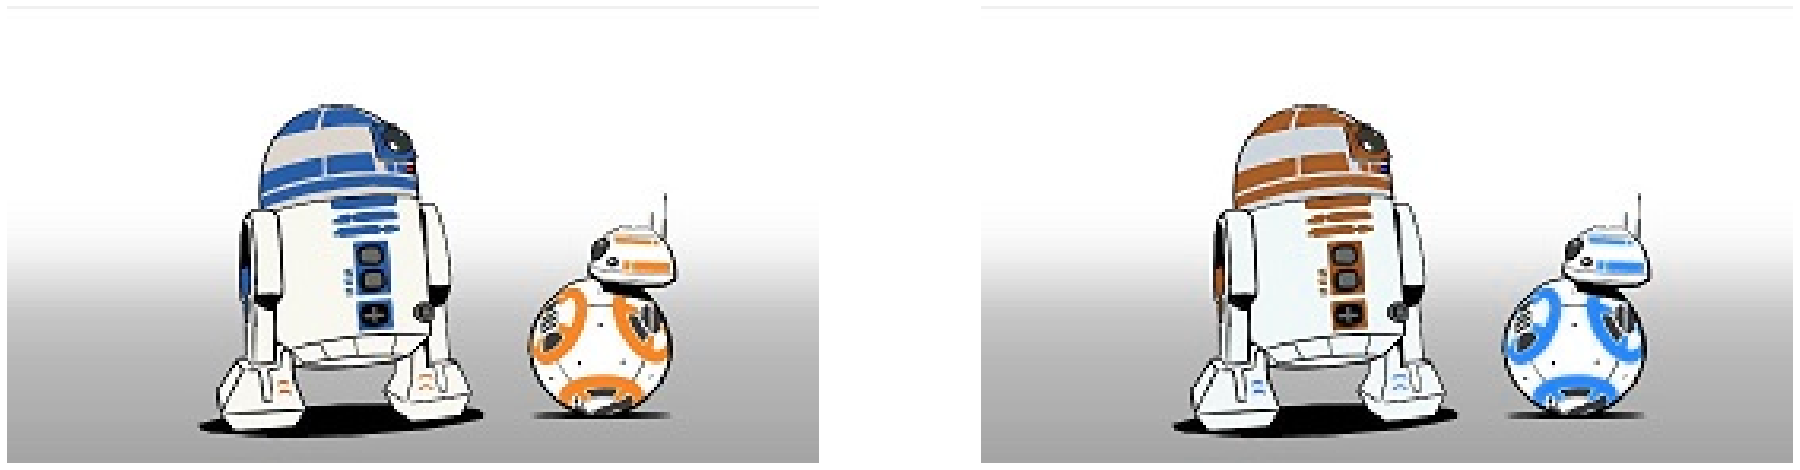

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(32, 16))
axs = axs.ravel()

axs[0].axis('off')
axs[0].imshow(img_rgb)

axs[1].axis('off')
axs[1].imshow(img_bgr)

plt.show()